In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
# IMPORT PACKAGES
#-------------------------------------------------------------------------------------------------------------------------------
%matplotlib widget

import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib.pyplot import cm
import tqdm
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# Functions
#-------------------------------------------------------------------------------------------------------------------------------
def moving_average(numbers, window_size):
    i = 0
    moving_averages = []
    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]

        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1
    return moving_averages

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
# LOGISTICS
#-------------------------------------------------------------------------------------------------------------------------------

# Define parts of file location
parent_directory = '/Users/michaeldawson/Documents/GitHub/Research/TestBatches'
batch_name = '2022-03-10--13-02-13'

# Combine parts of file location
batch_path = os.path.join(parent_directory,batch_name)
batch_data = pd.read_csv(os.path.join(batch_path,"batch_data.csv"),index_col=0)
device = batch_data['device'][0]

net_names = ['efficientdet_lite4_detection_metadata_2',
            'efficientdet_lite3_detection_metadata_1',
            'efficientdet_lite2_detection_metadata_1',
            'efficientdet_lite1_detection_metadata_1',
            'efficientdet_lite0_detection_metadata_1']

# Load in Data
old_df = None
test_data = {}

if batch_data['alg1'][0] == True :
    alg1_path = os.path.join(batch_path,"alg1")
    
    for net in net_names :
        net_path = os.path.join(alg1_path,'{}'.format(net))
        
        # Read in test parameters
        test_data['test_params_alg1_net{}'.format(net)] = pd.read_csv(os.path.join(alg1_path,"test_params.csv"),index_col=0)
        
        # Read in data from CSV into Pandas Dataframe
        test_data['metadata_alg1_net{}'.format(net)] = pd.read_csv(os.path.join(net_path,"metadata.csv"),index_col=0)
        
        # Read in data from testing spreadsheet
        test_data['df_alg1_net{}'.format(net)] = {}
        for i in range(0,len(test_data['metadata_alg1_net{}'.format(net)].index)):
            test_data['df_alg1_net{}'.format(net)][i] = pd.read_excel(os.path.join(net_path,"data.xlsx"),index_col=0,sheet_name="Test{}".format(i+1))
            
            #
            new_df = pd.read_excel(os.path.join(net_path,"data.xlsx"),index_col=0,sheet_name="Test{}".format(i+1))
            for key in list(test_data['test_params_alg1_net{}'.format(net)].keys()) :
                new_df[key] = test_data['test_params_alg1_net{}'.format(net)][key].tolist() * len(new_df) 
            for key in list(test_data['metadata_alg1_net{}'.format(net)].keys()) :
                new_df[key] = [test_data['metadata_alg1_net{}'.format(net)][key].tolist()[i]] * len(new_df) 
            new_df['alg'] = ['alg1']*len(new_df)

            if old_df is None : old_df = new_df
            else : old_df = pd.concat([old_df, new_df], ignore_index = False)
            #
            

if batch_data['alg2'][0] == True :
    alg2_path = os.path.join(batch_path,"alg2")
    # Read in test parameters
    test_data['test_params_alg2'] = pd.read_csv(os.path.join(alg2_path,"test_params.csv"),index_col=0)
    # Read in data from CSV into Pandas Dataframe
    test_data['metadata_alg2'] = pd.read_csv(os.path.join(alg2_path,"metadata.csv"),index_col=0)
    # Read in data from testing spreadsheet
    test_data['df_alg2'] = {}
    for i in range(0,len(test_data['metadata_alg2'].index)):
        test_data['df_alg2'][i] = pd.read_excel(os.path.join(alg2_path,"data.xlsx"),index_col=0,sheet_name="Test{}".format(i+1))
        
        #
        new_df = pd.read_excel(os.path.join(alg2_path,"data.xlsx"),index_col=0,sheet_name="Test{}".format(i+1))
        for key in list(test_data['test_params_alg2'].keys()) :
            new_df[key] = test_data['test_params_alg2'][key].tolist() * len(new_df) 
        for key in list(test_data['metadata_alg2'].keys()) :
            new_df[key] = [test_data['metadata_alg2'][key].tolist()[i]] * len(new_df) 
        new_df['alg'] = ['alg2']*len(new_df)

        if old_df is None : old_df = new_df
        else : old_df = pd.concat([old_df, new_df], ignore_index = False)
        #

        
if batch_data['alg3'][0] == True :
    alg3_path = os.path.join(batch_path,"alg3")
    # Read in test parameters
    test_data['test_params_alg3'] = pd.read_csv(os.path.join(alg3_path,"test_params.csv"),index_col=0)
    # Read in data from CSV into Pandas Dataframe
    test_data['metadata_alg3'] = pd.read_csv(os.path.join(alg3_path,"metadata.csv"),index_col=0)
    # Read in data from testing spreadsheet
    test_data['df_alg3'] = {}
    for i in range(0,len(test_data['metadata_alg3'].index)):
        test_data['df_alg3'][i] = pd.read_excel(os.path.join(alg3_path,"data.xlsx"),index_col=0,sheet_name="Test{}".format(i+1))

        #
        new_df = pd.read_excel(os.path.join(alg3_path,"data.xlsx"),index_col=0,sheet_name="Test{}".format(i+1))
        for key in list(test_data['test_params_alg3'].keys()) :
            new_df[key] = test_data['test_params_alg3'][key].tolist() * len(new_df) 
        for key in list(test_data['metadata_alg3'].keys()) :
            new_df[key] = [test_data['metadata_alg3'][key].tolist()[i]] * len(new_df) 
        new_df['alg'] = ['alg3']*len(new_df)

        if old_df is None : old_df = new_df
        else : old_df = pd.concat([old_df, new_df], ignore_index = False)
        #
        
data = old_df

In [4]:
# display(old_df)
# display(test_data['metadata_alg2'])

In [7]:
#-------------------------------------------------------------------------------------------------------------------------------
# Settings
#-------------------------------------------------------------------------------------------------------------------------------
threshold = data['threshold_temp'].tolist()[0]
# moving_average_window = test_params['moving_average_window'].tolist()[0]
moving_average_window = 20
end_of_detections = data['stop'].tolist()[0]
start_temp = data['start_temp'].tolist()[0]
net = data['start_net'].tolist()[0]
# if program_name == "Combined" : TAC = data['TAC'].tolist()

if net==1: net='MobileNetV1-SSD'
if net==2: net='MobileNetV1-PPN'
if net==3: net='MobileNetV2-SSD'
if net==4: net='InceptionV2-SSD'

num_pause_adjustment_coefficients = len(pd.unique(data['pause_adjustment_coef_records']))
num_initial_pause_durations = len(pd.unique(data['initial_pause_duration_records']))

plt.style.use('default')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 100

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

working_plasma = cmap = plt.get_cmap('plasma')
working_plasma = truncate_colormap(working_plasma, 0, 0.8)

colors = cm.plasma(np.linspace(0, 0.8, len(data['pause_adjustment_coef_records'])))

# Visualizations

$p_d$:   0%|          | 0/6 [00:00<?, ?it/s]

$p_a$:   0%|          | 0/6 [00:00<?, ?it/s]

NameError: name 'df' is not defined

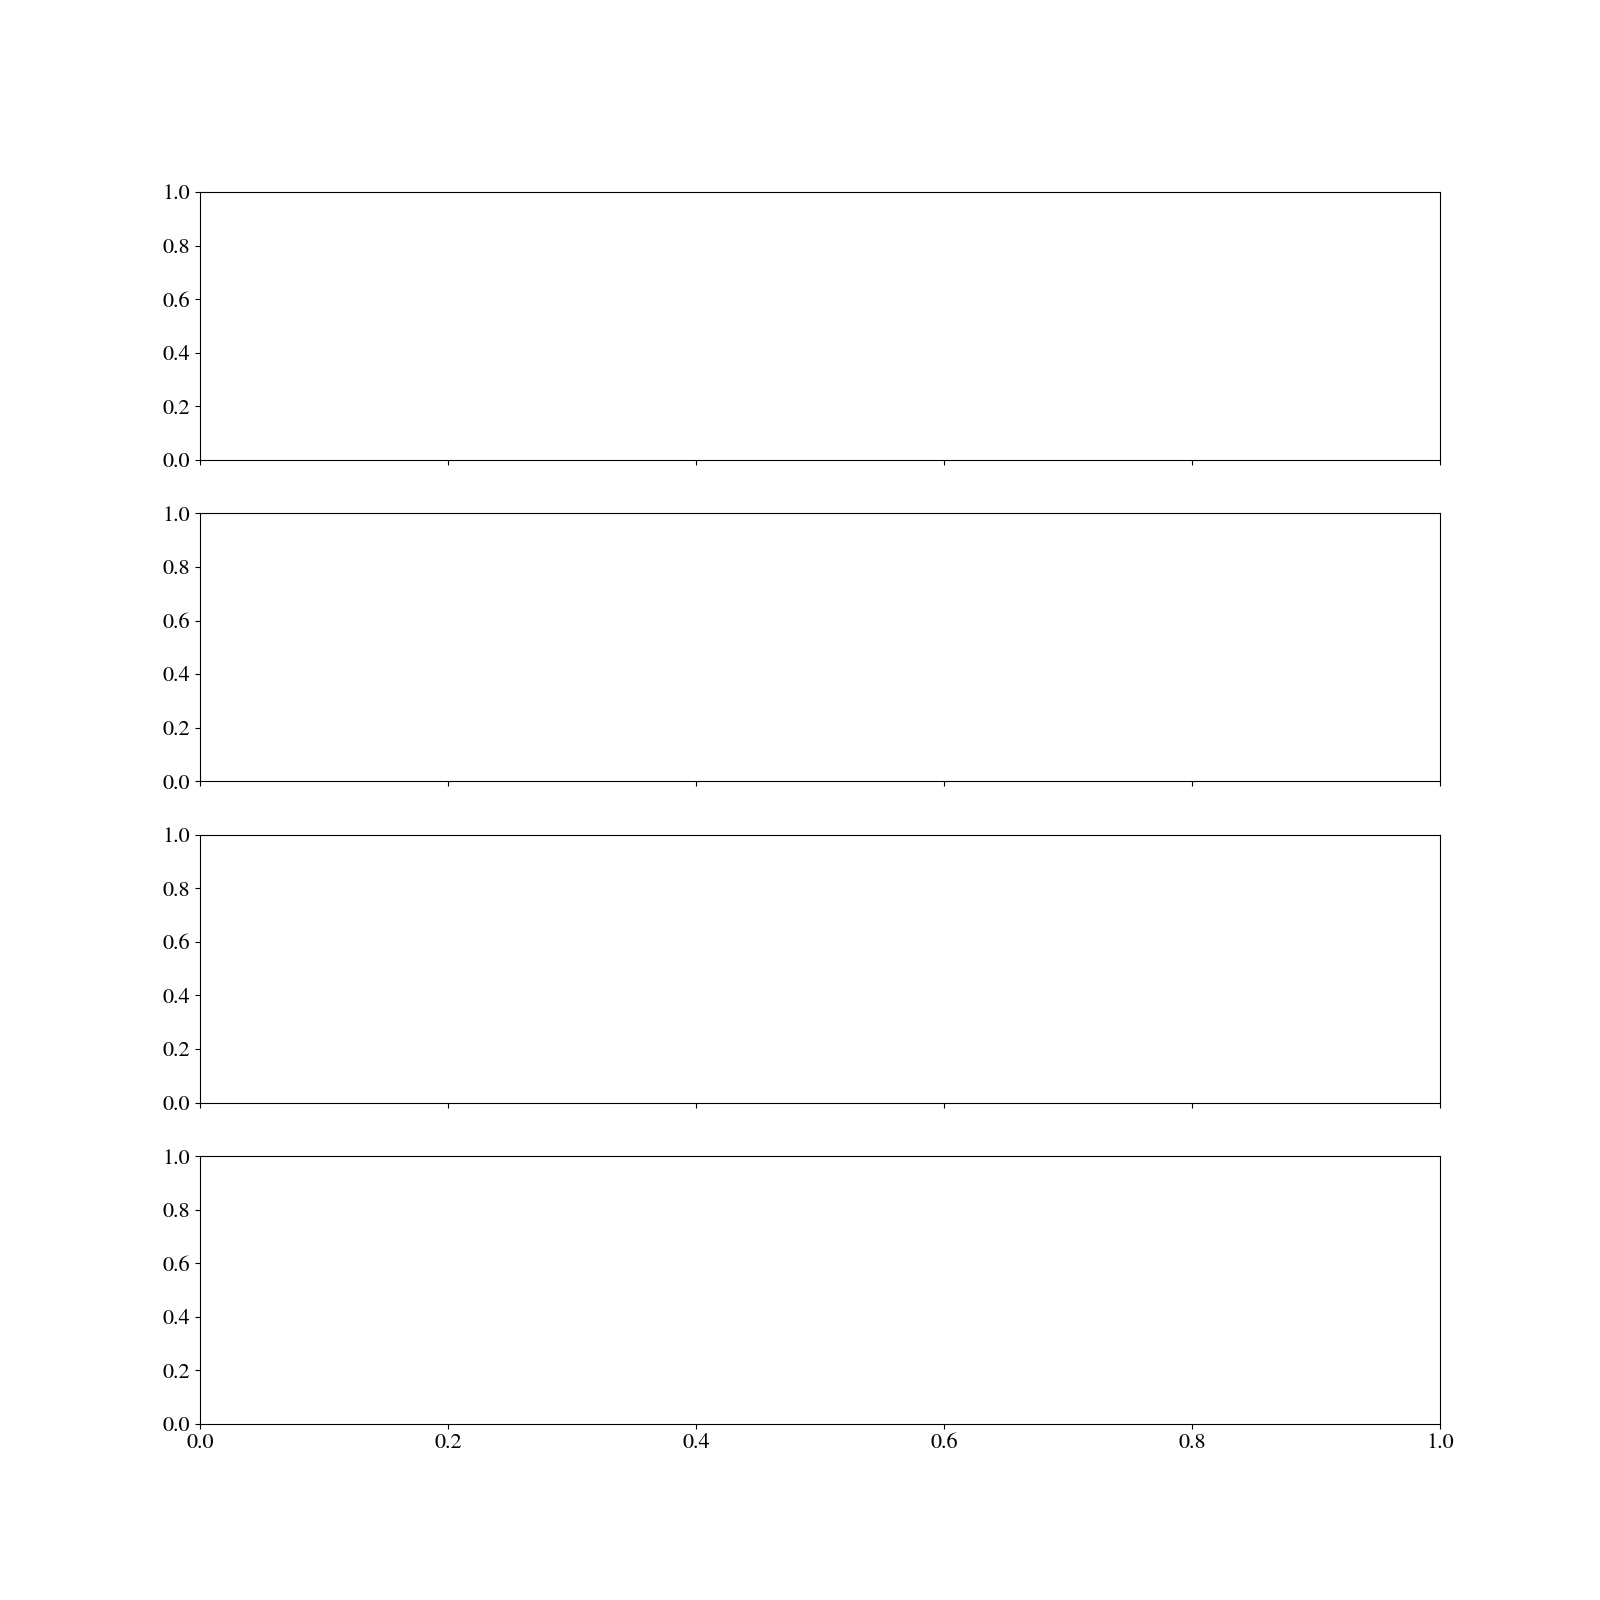

In [8]:
### Data Overview ###

# Temp
fig, axs = plt.subplots(nrows=4,ncols=1, sharey='row', sharex='col')
fig.set_figwidth(16)
fig.set_figheight(16)
temp = []
for i in tqdm.notebook.tnrange(0,num_initial_pause_durations,leave=False, desc='$p_d$') :
    for j in tqdm.notebook.tnrange(0, num_pause_adjustment_coefficients,leave=False, desc='$p_a$') :
        iterator=j+i*num_pause_adjustment_coefficients
        color = colors[iterator]

        working_df = data[iterator]
        length = len(working_df['temp_record_CPU'])

        graphing_times = np.linspace(working_df['time_record'][0],
             working_df['time_record'][length-1], 
             int(working_df['time_record'][length-1]))
        graphing_times = graphing_times.tolist()
        graphing_temp = []
        graphing_temp.append(0)
        for x in working_df['time_record']:
            for y in graphing_times:
                if x >= y and y > graphing_times[len(graphing_temp)-1]:
                    graphing_times_index = graphing_times.index(y)

                    temp_time_index = working_df.index[working_df['time_record']==x].tolist()
                    graphing_temp.append(working_df['temp_record_CPU'][temp_time_index[0]])
                    
        axs[0].step(working_df['time_record'],working_df['temp_record_CPU'], 
                    label="Test {} ; $p_a$: {} s /$^\circ$C ; $p_d$: {} s".format(j+i*num_pause_adjustment_coefficients+1, 
                                                              metadata['pause_adjustment_coef_records'][iterator],
                                                              metadata['initial_pause_duration_records'][iterator]),
                    color=color,
                    alpha=0.5
                   )
        axs[0].plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2) +
                          len(moving_average(graphing_temp,moving_average_window))),
                    moving_average(graphing_temp,moving_average_window),
                    label= "Test {}; {} Second Average".format(j+i*num_pause_adjustment_coefficients+1,moving_average_window),
                    color=color,
                    alpha=1)

        # Loops
        graphing_loopLength = []
        graphing_loopLength.append(0)
        for x in working_df['time_record']:
            for y in graphing_times:
                if x >= y and y > graphing_times[len(graphing_loopLength)-1]:
                    graphing_times_index = graphing_times.index(y)
                    loopLength_time_index = working_df.index[working_df['time_record']==x].tolist()
                    graphing_loopLength.append(working_df['loop_duration_record'][loopLength_time_index[0]])

        axs[1].step(working_df['time_record'],
                    working_df['loop_duration_record'], 
                    color=color, 
                    alpha=0.5
                   )
        axs[1].step(working_df['time_record'],
                    working_df['pause_duration_record'], 
                    alpha=0.3,
                    color=color
                   )
        axs[1].plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
                          len(moving_average(graphing_loopLength,moving_average_window))),
                    moving_average(graphing_loopLength,moving_average_window), 
                    color=color,
                    alpha=1
                   )   
        
        # CPU
        graphing_cpu = []
        graphing_cpu.append(0)
        for x in working_df['time_record']:
            for y in graphing_times:
                if x >= y and y > graphing_times[len(graphing_cpu)-1]:
                    graphing_times_index = graphing_times.index(y)
                    cpu_time_index = working_df.index[working_df['time_record']==x].tolist()
                    graphing_cpu.append(working_df['cpu_record'][cpu_time_index[0]])

        axs[2].step(working_df['time_record'],working_df['cpu_record'],color=color,alpha=0.5)
        axs[2].plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
            len(moving_average(graphing_cpu,moving_average_window))),
            moving_average(graphing_cpu,moving_average_window), color=color, alpha=1)

        axs[3].scatter(working_df['time_record'],working_df['net_record'], color=color)



if device == 'nano' :
    axs[0].axhline(y=97, color='red',alpha=0.3,zorder=0)
    axs[0].set_ylim([50,100])

elif device == 'rpi' :
    axs[0].axhline(y=80, color='red',alpha=0.3,zorder=0)
    axs[0].axhspan(80,85, color='red',alpha=0.1,label='Throttling Temperature',zorder=0)
    axs[0].axhline(y=85, color='red',alpha=0.3,zorder=0)
    axs[0].set_ylim([50,90])

axs[0].axhline(y=threshold, color='green',alpha=1,label='Desired Temperature',zorder=0)
        
axs[0].axvline(end_of_detections, color='red',alpha=0.3)
axs[0].set_ylabel('Temperature [$^\circ$C]')

if program_name == 'Combined' : axs[0].set_title('Temperature (Starting Network: {}, TAC: {})'.format(net,throughput_adjustment_tolerance))
else : axs[0].set_title('Temperature (Starting Network: {}'.format(net))
axs[0].grid()

# axs[1].set_ylim([0,3])        
axs[1].set_ylabel('Loop Length [s]')
axs[1].set_title('Loop Length (Starting Network: {})'.format(net))
axs[1].grid()

axs[2].set_ylim([0,100])        
axs[2].set_ylabel('CPU Usage [%]')
axs[2].set_title('CPU Usage (Starting Network: {})'.format(net))
axs[2].grid()

plt.sca(axs[3])
ticks = [3,4]
labels = ['MobileNetV2SSD', 'InceptionV2SSD']
plt.yticks(ticks, labels)
axs[3].set_xlabel('Time [s]')


fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))

# Save plot
plot4_path = os.path.join(path, "Combined_color_net_{}.png".format(net))
plt.savefig(plot4_path,bbox_inches="tight",dpi=400)
plt.show()

In [ ]:
if program_name == ('Variable_Loop_V2' or 'Variable_Loop_V2_alg2') :
### Create Meta-result DF ###
    mean_cpu = []
    mean_loop_duration = []
    mean_temp = []
    temp_error = []
    first_temp = []
    for i in tqdm.notebook.tnrange(0,num_initial_pause_durations,leave=False) :
        for j in tqdm.notebook.tnrange(0, num_pause_adjustment_coefficients,leave=False) :
            iterator = j+i*num_pause_adjustment_coefficients
            working_df = df[iterator]
            mean_cpu.append(working_df['cpu_record'].mean())
            mean_loop_duration.append(working_df['loop_duration_record'].mean())
            mean_temp.append(working_df['temp_record_CPU'].mean())
            temp_error.append((working_df['temp_record_CPU'].sub(threshold)).pow(2).mean())
    #         first_temp.append(working_df['temp_record_CPU'][0])

    mean_record = {'mean_cpu':mean_cpu,
                   'mean_loop_duration':mean_loop_duration,
                   'mean_temp':mean_temp,
                   'temp_error':temp_error,
    #                'first_temp':first_temp
                  }
    mean_record_df = pd.DataFrame.from_dict(mean_record)
    means_and_meta_df = metadata.join(mean_record_df)
    means_and_meta_df['results'] = 10* (1/means_and_meta_df['mean_loop_duration']) * 1/(means_and_meta_df["mean_cpu"]/100) 

    # means_and_meta_df

In [ ]:
if program_name == ('Variable_Loop_V2' or 'Variable_Loop_V2_alg2') :
    ### Mean Temp Topology ###

    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection='3d')

    x = metadata['initial_pause_duration_records']
    y = metadata['pause_adjustment_coef_records']
    z = means_and_meta_df['mean_temp']

    ax.scatter3D(x,y,z,c=z,cmap=working_plasma,linewidth=0.5)
    ax.set_xlabel('$p_d$')
    ax.set_ylabel('$p_a$')
    ax.set_zlabel('Mean Temperature [$^\circ$C]')
    plt.xticks(np.linspace(0, max(x), num_initial_pause_durations))
    plt.yticks(np.linspace(0, max(y), num_pause_adjustment_coefficients))
    ax.view_init(30, -45)

    plot5_path = os.path.join(path, "scatter_net_{}.png".format(net))
    plt.savefig(plot5_path,bbox_inches="tight",dpi=400)
    plt.show()

    fig = plt.figure(figsize=(6,6))

    ax = plt.axes(projection='3d')
    ax.plot_trisurf(x, y, z,cmap=working_plasma, edgecolor='none')
    ax.set_xlabel('$p_d$')
    ax.set_ylabel('$p_a$')
    ax.set_zlabel('Mean Temperature [$^\circ$ C]')
    plt.xticks(np.linspace(0, max(x), num_initial_pause_durations))
    plt.yticks(np.linspace(0, max(y), num_pause_adjustment_coefficients))
    ax.view_init(30, -45)


    plot6_path = os.path.join(path, "topology_net_{}.png".format(net))
    plt.savefig(plot6_path,bbox_inches="tight",dpi=400)
    plt.show()

In [ ]:
if program_name == ('Variable_Loop_V2' or 'Variable_Loop_V2_alg2') :

    ### "Efficiency" ###

    sns.heatmap(means_and_meta_df.corr())
    plot9_path = os.path.join(path, "mean_corr_heatmap_net_{}.png".format(net))
    plt.savefig(plot9_path,bbox_inches="tight",dpi=400)
    plt.show()


    pivoted = means_and_meta_df.pivot('pause_adjustment_coef_records','initial_pause_duration_records','results')
    pivoted = pivoted.T
    axs = plt.axes()
    sns.heatmap(pivoted,
                annot=True,
                cmap=working_plasma,
                fmt='.4g',
                cbar_kws={'label': '(10x) FPS per fraction of CPU use ',"orientation": "horizontal"}
               )
    axs.set_title('Image Processing Efficiency (Network: {})'.format(net))
    axs.set_ylabel('Initial Loop Length [s]')
    axs.set_xlabel('Loop Length Adjustment Coef. [s /$^\circ$C]')
    plot10_path = os.path.join(path, "results_net_{}.png".format(net))
    plt.savefig(plot10_path,bbox_inches="tight",dpi=400)
    plt.show()

In [ ]:
### Temp v. Time (Paper) ###

colors = cm.plasma(np.linspace(0, 0.8, 4))
fig, axs = plt.subplots(nrows=1,ncols=1, sharey='row', sharex='col')
fig.set_figwidth(6)
fig.set_figheight(4)
temp = []
count = 0

###################
### Algorithm 1 ###
###################

if program_name == 'Variable_Loop_V2' :
    for i in tqdm.notebook.tnrange(0,5,4,leave=False) :
        for j in tqdm.notebook.tnrange(0,5,4,leave=False) :
            
            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator+5
            color = colors[count]

            working_df = df[iterator]
            length = len(working_df['temp_record_CPU'])

            graphing_times = np.linspace(working_df['time_record'][0],
                                         working_df['time_record'][length-1], 
                                         int(working_df['time_record'][length-1]))
            graphing_times = graphing_times.tolist()
            graphing_temp = []
            graphing_temp.append(0)
            for x in working_df['time_record']:
                for y in graphing_times:
                    if x >= y and y > graphing_times[len(graphing_temp)-1]:
                        graphing_times_index = graphing_times.index(y)

                        temp_time_index = working_df.index[working_df['time_record']==x].tolist()
                        graphing_temp.append(working_df['temp_record_CPU'][temp_time_index[0]])

            axs.step(working_df['time_record'],working_df['temp_record_CPU'], 
    #                     label="Test {} ; $p_a$: {}s/$^\circ$C ; $p_d$: {}s".format(
    #                         iterator+1,
    #                         metadata['pause_adjustment_coef_records'][iterator],
    #                         metadata['initial_pause_duration_records'][iterator]),
                        color=color,
                        alpha=0.1,
                        zorder=zorder
                       )
            axs.plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)
                        + len(moving_average(graphing_temp,moving_average_window))),
                        moving_average(graphing_temp,moving_average_window),
                        color=color,
    #                     label= "Test {} ; {} Second Average".format(iterator+1,moving_average_window),
                        label="Test {}, $p_a$: {} s/$^\circ$C, $p_d$: {} s".format(
                            iterator+1,
                            metadata['pause_adjustment_coef_records'][iterator],
                            metadata['initial_pause_duration_records'][iterator]),                    
                        alpha=1,
                        zorder=zorder
    #                     linewidth=
                       )
            plt.step(working_df[1:].iloc[0::2,:]['time_record'],working_df[1:].iloc[0::2,:]['temp_record_CPU'],
                     color=color,
                     alpha=0.2)
            plt.step(working_df[1:].iloc[1::2,:]['time_record'],working_df[1:].iloc[1::2,:]['temp_record_CPU'],
                     color=color,
                     alpha=0.2)
            count += 1
            
    if device == 'nano' :
        axs.axhline(y=97, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,100])

    elif device == 'rpi' :
        axs.axhline(y=80, color='red',alpha=0.3,zorder=0)
        axs.axhspan(80,85, color='red',alpha=0.1,label='Throttling Temperature',zorder=0)
        axs.axhline(y=85, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,90])
    
    axs.axhline(y=threshold, color='green',alpha=1,label='Desired Temperature',zorder=0)
    axs.set_ylabel('Temperature [$^\circ$C]')
    axs.set_title('{} Temperature'.format(net))
    axs.grid()
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.95))
    axs.set_xlabel('Time [s]')

    # Save plot
    plot11_path = os.path.join(path, "TempEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot11_path,bbox_inches="tight",dpi=400)

    ## Clean
    fig, axs = plt.subplots(nrows=1,ncols=1, sharey='row', sharex='col')
    fig.set_figwidth(6)
    fig.set_figheight(4)
    temp = []
    count = 0
    for i in tqdm.notebook.tnrange(0,5,4,leave=False) :
        for j in tqdm.notebook.tnrange(0,5,4,leave=False) :
    # for i in tqdm.notebook.tnrange(0,1,leave=False) :
    #     for j in tqdm.notebook.tnrange(0,1,leave=False) :
            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator+5
            color = colors[count]
            working_df = df[iterator]

            plt.step(working_df[1:].iloc[0::2,:]['time_record'],working_df[1:].iloc[0::2,:]['temp_record_CPU'],
                     color=color,
                     label="Test {}, $p_a$: {} s/$^\circ$C, $p_d$: {} s".format(
                         iterator+1,
                         metadata['pause_adjustment_coef_records'][iterator],
                         metadata['initial_pause_duration_records'][iterator]),                
                     alpha=1)
            count += 1

    if device == 'nano' :
        axs.axhline(y=97, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,100])

    elif device == 'rpi' :
        axs.axhline(y=80, color='red',alpha=0.3,zorder=0)
        axs.axhspan(80,85, color='red',alpha=0.1,label='Throttling Temperature',zorder=0)
        axs.axhline(y=85, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,90])
    
    axs.axhline(y=threshold, color='green',alpha=1,label='Desired Temperature',zorder=0)
        
    axs.set_ylabel('Temperature [$^\circ$C]')
    axs.set_title('{} Temperature'.format(net))
    axs.grid()
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.95))
    # axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6))
    axs.set_xlabel('Time [s]')

    # Save plot
    plot11_path = os.path.join(path, "CleanTempEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot11_path,bbox_inches="tight",dpi=400)

    
###################
### Algorithm 2 ###
###################
            
if program_name == 'Variable_Loop_V2_alg2' :
    for i in tqdm.notebook.tnrange(0,1,leave=False) :
        for j in tqdm.notebook.tnrange(0,1,leave=False) :
            
            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator+5
            color = colors[count]

            working_df = df[iterator]
            length = len(working_df['temp_record_CPU'])

            graphing_times = np.linspace(working_df['time_record'][0],
                                         working_df['time_record'][length-1], 
                                         int(working_df['time_record'][length-1]))
            graphing_times = graphing_times.tolist()
            graphing_temp = []
            graphing_temp.append(0)
            for x in working_df['time_record']:
                for y in graphing_times:
                    if x >= y and y > graphing_times[len(graphing_temp)-1]:
                        graphing_times_index = graphing_times.index(y)

                        temp_time_index = working_df.index[working_df['time_record']==x].tolist()
                        graphing_temp.append(working_df['temp_record_CPU'][temp_time_index[0]])

            axs.step(working_df['time_record'],working_df['temp_record_CPU'], 
    #                     label="Test {} ; $p_a$: {}s/$^\circ$C ; $p_d$: {}s".format(
    #                         iterator+1,
    #                         metadata['pause_adjustment_coef_records'][iterator],
    #                         metadata['initial_pause_duration_records'][iterator]),
                        color=color,
                        alpha=0.1,
                        zorder=zorder
                       )
            axs.plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)
                        + len(moving_average(graphing_temp,moving_average_window))),
                        moving_average(graphing_temp,moving_average_window),
                        color=color,
    #                     label= "Test {} ; {} Second Average".format(iterator+1,moving_average_window),
                        label="Test {}, $p_a$: {} s/$^\circ$C, $p_d$: {} s".format(
                            iterator+1,
                            metadata['pause_adjustment_coef_records'][iterator],
                            metadata['initial_pause_duration_records'][iterator]),                    
                        alpha=1,
                        zorder=zorder
    #                     linewidth=
                       )
            plt.step(working_df[1:].iloc[0::2,:]['time_record'],working_df[1:].iloc[0::2,:]['temp_record_CPU'],
                     color=color,
                     alpha=0.2)
            plt.step(working_df[1:].iloc[1::2,:]['time_record'],working_df[1:].iloc[1::2,:]['temp_record_CPU'],
                     color=color,
                     alpha=0.2)
            count += 1

    if device == 'nano' :
        axs.axhline(y=97, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,100])

    elif device == 'rpi' :
        axs.axhline(y=80, color='red',alpha=0.3,zorder=0)
        axs.axhspan(80,85, color='red',alpha=0.1,label='Throttling Temperature',zorder=0)
        axs.axhline(y=85, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,90])
    
    axs.axhline(y=threshold, color='green',alpha=1,label='Desired Temperature',zorder=0)
        
    axs.set_ylabel('Temperature [$^\circ$C]')
    axs.set_title('{} Temperature'.format(net))
    axs.grid()
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.95))
    axs.set_xlabel('Time [s]')

    # Save plot
    plot11_path = os.path.join(path, "TempEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot11_path,bbox_inches="tight",dpi=400)

    ## Clean
    fig, axs = plt.subplots(nrows=1,ncols=1, sharey='row', sharex='col')
    fig.set_figwidth(6)
    fig.set_figheight(4)
    temp = []
    count = 0
    # for i in tqdm.notebook.tnrange(0,5,4,leave=False) :
    #     for j in tqdm.notebook.tnrange(0,5,4,leave=False) :
    for i in tqdm.notebook.tnrange(0,1,leave=False) :
        for j in tqdm.notebook.tnrange(0,1,leave=False) :
            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator+5
            color = colors[count]
            working_df = df[iterator]

            plt.step(working_df[1:].iloc[0::2,:]['time_record'],working_df[1:].iloc[0::2,:]['temp_record_CPU'],
                     color=color,
                     label="Test {}, $p_a$: {} s/$^\circ$C, $p_d$: {} s".format(
                         iterator+1,
                         metadata['pause_adjustment_coef_records'][iterator],
                         metadata['initial_pause_duration_records'][iterator]),                
                     alpha=1)
            count += 1

    if device == 'nano' :
        axs.axhline(y=97, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,100])

    elif device == 'rpi' :
        axs.axhline(y=80, color='red',alpha=0.3,zorder=0)
        axs.axhspan(80,85, color='red',alpha=0.1,label='Throttling Temperature',zorder=0)
        axs.axhline(y=85, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,90])
    
    axs.axhline(y=threshold, color='green',alpha=1,label='Desired Temperature',zorder=0)

    axs.set_ylim([50,90])
    axs.set_ylabel('Temperature [$^\circ$C]')
    axs.set_title('{} Temperature'.format(net))
    axs.grid()
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.95))
    # axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6))
    axs.set_xlabel('Time [s]')

    # Save plot
    plot11_path = os.path.join(path, "CleanTempEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot11_path,bbox_inches="tight",dpi=400)



###################
### Algorithm 3 ###
###################
    
## Switching
if program_name == 'Combined' :
    for i in tqdm.notebook.tnrange(0,1,leave=False) :
        for j in tqdm.notebook.tnrange(0,1,leave=False) :
            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator+5
            color = colors[count]
            working_df = df[iterator]

            plt.step(working_df[1:].iloc[0::2,:]['time_record'],working_df[1:].iloc[0::2,:]['temp_record_CPU'],
                     color=color,
                     label="Algorithm 2 Test",                
                     alpha=1)
            count += 1

    if device == 'nano' :
        axs.axhline(y=97, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,100])

    elif device == 'rpi' :
        axs.axhline(y=80, color='red',alpha=0.3,zorder=0)
        axs.axhspan(80,85, color='red',alpha=0.1,label='Throttling Temperature',zorder=0)
        axs.axhline(y=85, color='red',alpha=0.3,zorder=0)
        axs.set_ylim([50,90])
    
    axs.axhline(y=threshold, color='green',alpha=1,label='Desired Temperature',zorder=0)

    axs.set_ylabel('Temperature [$^\circ$C]')
    axs.set_title('Temperature')
    axs.grid()
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6))
    axs.set_xlabel('Time [s]')

    # Save plot
    plot11_path = os.path.join(path, "SwitchingTempEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot11_path,bbox_inches="tight",dpi=400)

plt.show()

In [ ]:
### Loop v. Time (Paper) ###

colors = cm.plasma(np.linspace(0, 0.8, 4))
fig, axs = plt.subplots(nrows=1,ncols=1, sharey='row', sharex='col')
fig.set_figwidth(6)
fig.set_figheight(4)
temp = []
count = 0

###################
### Algorithm 1 ###
###################

if program_name == 'Variable_Loop_V2' :
    for i in tqdm.notebook.tnrange(0,5,4,leave=False) :
        for j in tqdm.notebook.tnrange(0,5,4,leave=False) :

            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator
            color = colors[count]

            working_df = df[iterator]
            length = len(working_df['temp_record_CPU'])

            graphing_loopLength = []
            graphing_loopLength.append(0)
            for x in working_df['time_record']:
                for y in graphing_times:
                    if x >= y and y > graphing_times[len(graphing_loopLength)-1]:
                        graphing_times_index = graphing_times.index(y)
                        loopLength_time_index = working_df.index[working_df['time_record']==x].tolist()
                        graphing_loopLength.append(working_df['loop_duration_record'][loopLength_time_index[0]])

            axs.step(working_df['time_record'], 
                     working_df['loop_duration_record'],
                     color=color, 
                     alpha=1,
                     zorder=zorder,
                     label="Test {}, $p_a$: {} s/$^\circ$C, $p_d$: {} s".format(
                         iterator+1,
                         metadata['pause_adjustment_coef_records'][iterator],
                         metadata['initial_pause_duration_records'][iterator])                 
                    )      

    #         axs.plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
    #                           len(moving_average(graphing_loopLength,moving_average_window))),
    #                        moving_average(graphing_loopLength,moving_average_window), 
    #                  color=color,
    #                  alpha=1,
    #                  label="Test {} ; $p_a$: {} s /$^\circ$C ; $p_d$: {} s".format(
    #                      iterator+1,
    #                      metadata['pause_adjustment_coef_records'][iterator],
    #                      metadata['initial_pause_duration_records'][iterator])
    #                    )   

            axs.step(working_df['time_record'], working_df['pause_duration_record'], 
                        alpha=0.5,
                        color=color,
                        zorder=zorder,
                        label= "Test {}, Pause Duration".format(iterator+1),
                       )  

            count +=1

    axs.set_ylabel('Loop Length [s]')
    axs.set_title('{} Loop Length'.format(net))
    axs.grid()
    axs.set_xlabel('Time [s]')
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -1.15))

    # Save plot
    plot12_path = os.path.join(path, "LoopEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot12_path,bbox_inches="tight",dpi=400)


    
###################
### Algorithm 2 ###
###################

if program_name == 'Variable_Loop_V2_alg2' :
    for i in tqdm.notebook.tnrange(0,1,leave=False) :
        for j in tqdm.notebook.tnrange(0,1,leave=False) :

            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator
            color = colors[count]

            working_df = df[iterator]
            length = len(working_df['temp_record_CPU'])

            graphing_loopLength = []
            graphing_loopLength.append(0)
            for x in working_df['time_record']:
                for y in graphing_times:
                    if x >= y and y > graphing_times[len(graphing_loopLength)-1]:
                        graphing_times_index = graphing_times.index(y)
                        loopLength_time_index = working_df.index[working_df['time_record']==x].tolist()
                        graphing_loopLength.append(working_df['loop_duration_record'][loopLength_time_index[0]])

            axs.step(working_df['time_record'], 
                     working_df['loop_duration_record'],
                     color=color, 
                     alpha=1,
                     zorder=zorder,
                     label="Test {}, $p_a$: {} s/$^\circ$C, $p_d$: {} s".format(
                         iterator+1,
                         metadata['pause_adjustment_coef_records'][iterator],
                         metadata['initial_pause_duration_records'][iterator])                 
                    )      

    #         axs.plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
    #                           len(moving_average(graphing_loopLength,moving_average_window))),
    #                        moving_average(graphing_loopLength,moving_average_window), 
    #                  color=color,
    #                  alpha=1,
    #                  label="Test {} ; $p_a$: {} s /$^\circ$C ; $p_d$: {} s".format(
    #                      iterator+1,
    #                      metadata['pause_adjustment_coef_records'][iterator],
    #                      metadata['initial_pause_duration_records'][iterator])
    #                    )   

            axs.step(working_df['time_record'], working_df['pause_duration_record'], 
                        alpha=0.5,
                        color=color,
                        zorder=zorder,
                        label= "Test {}, Pause Duration".format(iterator+1),
                       )  

            count +=1

    axs.set_ylabel('Loop Length [s]')
    axs.set_title('{} Loop Length'.format(net))
    axs.grid()
    axs.set_xlabel('Time [s]')
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -1.15))

    # Save plot
    plot12_path = os.path.join(path, "LoopEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot12_path,bbox_inches="tight",dpi=400)

    
    
###################
### Algorithm 3 ###
###################

## Switching

if program_name == 'Combined' :
    for i in tqdm.notebook.tnrange(0,1,leave=False) :
        for j in tqdm.notebook.tnrange(0,1,leave=False) :

            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator
            color = colors[count]

            working_df = df[iterator]
            length = len(working_df['temp_record_CPU'])

            graphing_loopLength = []
            graphing_loopLength.append(0)
            for x in working_df['time_record']:
                for y in graphing_times:
                    if x >= y and y > graphing_times[len(graphing_loopLength)-1]:
                        graphing_times_index = graphing_times.index(y)
                        loopLength_time_index = working_df.index[working_df['time_record']==x].tolist()
                        graphing_loopLength.append(working_df['loop_duration_record'][loopLength_time_index[0]])

            axs.step(working_df['time_record'], 
                     working_df['loop_duration_record'],
                     color=color, 
                     alpha=1,
                     zorder=zorder,
                     label="Algorithm 2 Test"                
                    )      

    #         axs.plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
    #                           len(moving_average(graphing_loopLength,moving_average_window))),
    #                        moving_average(graphing_loopLength,moving_average_window), 
    #                  color=color,
    #                  alpha=1,
    #                  label="Test {} ; $p_a$: {} s /$^\circ$C ; $p_d$: {} s".format(
    #                      iterator+1,
    #                      metadata['pause_adjustment_coef_records'][iterator],
    #                      metadata['initial_pause_duration_records'][iterator])
    #                    )   

            axs.step(working_df['time_record'], working_df['pause_duration_record'], 
                        alpha=0.5,
                        color=color,
                        zorder=zorder,
                        label= "Pause Duration"
                       )  

            count +=1

    axs.set_ylabel('Loop Length [s]')
    axs.set_title('Loop Length')
    axs.grid()
    axs.set_xlabel('Time [s]')
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))

    # Save plot
    plot12_path = os.path.join(path, "SwitchingLoopEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot12_path,bbox_inches="tight",dpi=400)

plt.show()

In [ ]:
### CPU v. Time (Paper) ###

colors = cm.plasma(np.linspace(0, 0.8, 4))
fig, axs = plt.subplots(nrows=1,ncols=1, sharey='row', sharex='col')
fig.set_figwidth(6)
fig.set_figheight(4)
temp = []
count = 0


###################
### Algorithm 1 ###
###################

if program_name == 'Variable_Loop_V2' :
    for i in tqdm.notebook.tnrange(0,5,4,leave=False) :
        for j in tqdm.notebook.tnrange(0,5,4,leave=False) :
            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator
            color = colors[count]

            working_df = df[iterator]
            length = len(working_df['temp_record_CPU'])

            graphing_cpu = []
            graphing_cpu.append(0)
            for x in working_df['time_record']:
                for y in graphing_times:
                    if x >= y and y > graphing_times[len(graphing_cpu)-1]:
                        graphing_times_index = graphing_times.index(y)
                        cpu_time_index = working_df.index[working_df['time_record']==x].tolist()
                        graphing_cpu.append(working_df['cpu_record'][cpu_time_index[0]])

    #         axs.step(working_df['time_record'],working_df['cpu_record'],
    #                     color=color,
    #                     alpha=0.05,
    #                     zorder=zorder,
    # #                     label="Test {} ; $p_a$: {}$/degree$C ; $p_d$: {}s".format(
    # #                         iterator+1,
    # #                         metadata['pause_adjustment_coef_records'][iterator],
    # #                         metadata['initial_pause_duration_records'][iterator]),
    #                    )
            axs.plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
                        len(moving_average(graphing_cpu,moving_average_window))),
                        moving_average(graphing_cpu,moving_average_window), 
                        color=color, 
                        alpha=1,
                        zorder=zorder,
    #                     label= "Test {} ; {} Second Average".format(iterator+1,moving_average_window),
                        label="Test {}, $p_a$: {} s/$^\circ$C, $p_d$: {} s".format(
                            iterator+1,
                            metadata['pause_adjustment_coef_records'][iterator],
                            metadata['initial_pause_duration_records'][iterator]),                    
                       )
            count += 1

    axs.set_ylim([0,100])        
    axs.set_ylabel('CPU Usage [%]')
    axs.set_xlabel('Time [s]')
    axs.set_title('{} CPU Usage'.format(net))
    axs.grid()
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.73))

    # Save plot
    plot13_path = os.path.join(path, "CPUEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot13_path,bbox_inches="tight",dpi=400)


###################
### Algorithm 2 ###
###################

if program_name == 'Variable_Loop_V2_alg2' :
    for i in tqdm.notebook.tnrange(0,1,leave=False) :
        for j in tqdm.notebook.tnrange(0,1,leave=False) :
            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator
            color = colors[count]

            working_df = df[iterator]
            length = len(working_df['temp_record_CPU'])

            graphing_cpu = []
            graphing_cpu.append(0)
            for x in working_df['time_record']:
                for y in graphing_times:
                    if x >= y and y > graphing_times[len(graphing_cpu)-1]:
                        graphing_times_index = graphing_times.index(y)
                        cpu_time_index = working_df.index[working_df['time_record']==x].tolist()
                        graphing_cpu.append(working_df['cpu_record'][cpu_time_index[0]])

    #         axs.step(working_df['time_record'],working_df['cpu_record'],
    #                     color=color,
    #                     alpha=0.05,
    #                     zorder=zorder,
    # #                     label="Test {} ; $p_a$: {}$/degree$C ; $p_d$: {}s".format(
    # #                         iterator+1,
    # #                         metadata['pause_adjustment_coef_records'][iterator],
    # #                         metadata['initial_pause_duration_records'][iterator]),
    #                    )
            axs.plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
                        len(moving_average(graphing_cpu,moving_average_window))),
                        moving_average(graphing_cpu,moving_average_window), 
                        color=color, 
                        alpha=1,
                        zorder=zorder,
    #                     label= "Test {} ; {} Second Average".format(iterator+1,moving_average_window),
                        label="Test {}, $p_a$: {} s/$^\circ$C, $p_d$: {} s".format(
                            iterator+1,
                            metadata['pause_adjustment_coef_records'][iterator],
                            metadata['initial_pause_duration_records'][iterator]),                    
                       )
            count += 1

    axs.set_ylim([0,100])        
    axs.set_ylabel('CPU Usage [%]')
    axs.set_xlabel('Time [s]')
    axs.set_title('{} CPU Usage'.format(net))
    axs.grid()
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.73))

    # Save plot
    plot13_path = os.path.join(path, "CPUEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot13_path,bbox_inches="tight",dpi=400)



###################
### Algorithm 3 ###
###################

## Switching
if program_name == 'Combined' :

    for i in tqdm.notebook.tnrange(0,1,leave=False) :
        for j in tqdm.notebook.tnrange(0,1,leave=False) :
            iterator = j+i*num_pause_adjustment_coefficients
            zorder = iterator
            color = colors[count]

            working_df = df[iterator]
            length = len(working_df['temp_record_CPU'])

            graphing_cpu = []
            graphing_cpu.append(0)
            for x in working_df['time_record']:
                for y in graphing_times:
                    if x >= y and y > graphing_times[len(graphing_cpu)-1]:
                        graphing_times_index = graphing_times.index(y)
                        cpu_time_index = working_df.index[working_df['time_record']==x].tolist()
                        graphing_cpu.append(working_df['cpu_record'][cpu_time_index[0]])

    #         axs.step(working_df['time_record'],working_df['cpu_record'],
    #                     color=color,
    #                     alpha=0.05,
    #                     zorder=zorder,
    # #                     label="Test {} ; $p_a$: {}$/degree$C ; $p_d$: {}s".format(
    # #                         iterator+1,
    # #                         metadata['pause_adjustment_coef_records'][iterator],
    # #                         metadata['initial_pause_duration_records'][iterator]),
    #                    )
            axs.plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
                        len(moving_average(graphing_cpu,moving_average_window))),
                        moving_average(graphing_cpu,moving_average_window), 
                        color=color, 
                        alpha=1,
                        zorder=zorder,
    #                     label= "Test {} ; {} Second Average".format(iterator+1,moving_average_window),
                        label="Algorithm 2 Test"                    
                       )
            count += 1

    axs.set_ylim([0,100])        
    axs.set_ylabel('CPU Usage [%]')
    axs.set_xlabel('Time [s]')
    axs.set_title('CPU Usage')
    axs.grid()
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))

    # Save plot
    plot13_path = os.path.join(path, "SwitchingCPUEffectOfMetareasoning_net_{}.png".format(net))
    plt.savefig(plot13_path,bbox_inches="tight",dpi=400)

plt.show()

## Switching

In [ ]:
if program_name == 'Variable_Loop_V2_alg2' or 'Combined' :

    colors = cm.plasma(np.linspace(0, 0.8, 2))
    count = 0

    for i in tqdm.notebook.tnrange(0,1,4,leave=False) :
        for j in tqdm.notebook.tnrange(0,1,4,leave=False) :
            fig, axs = plt.subplots(nrows=1,ncols=1, sharey='row', sharex='col')
            fig.set_figwidth(6)
            fig.set_figheight(4)
    #         iterator = j+i*num_pause_adjustment_coefficients
    #         zorder = iterator
            # color = colors[count]
            working_df = df[iterator]
    #         length = len(working_df['temp_record_CPU'])

            sns.histplot(data=working_df, x="time_record", hue="net_record", multiple="stack", bins=30, palette =working_plasma)
    #         count += 1

    #         plt.sca(axs)
    #         ticks = [3,4]
            labels = ['InceptionV2SSD', 'MobileNetV2SSD']
            axs.set_title('Algorithm 2 Network Distribution')
            axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),labels=labels)
            axs.set_xlabel('Time [s]')

            plot13_path = os.path.join(path, "SwitchingGraph")
            plt.savefig(plot13_path,bbox_inches="tight",dpi=400)
            plt.show()


In [ ]:
working_df['temp_record_CPU'].min()
colors

## Combined

In [ ]:
if batch_data['alg3'][0] == True :

    from matplotlib.animation import FuncAnimation
    import matplotlib.animation as animation
    from IPython.display import HTML
    fig, axs = plt.subplots(nrows=1,ncols=1, sharey='row', sharex='col')
    fig.set_figwidth(6)
    fig.set_figheight(4)

    working_df = test_data['df_alg3'][0]
    length = len(working_df['temp_record_CPU'][5:])
    colors = cm.plasma(np.linspace(0, 0.8, length))

    plotting_accuracy = np.linspace(working_df['avg_accuracy_record'].min(),working_df['avg_accuracy_record'].max(),10)
    
    if device == 'nano' :
        plotting_throughput = 1/0.68 - (0.739-plotting_accuracy)*TAC
    elif device == 'rpi' :
        plotting_throughput = 1/1.775 - (0.739-plotting_accuracy)*TAC

    axs.plot(plotting_accuracy, plotting_throughput, '--', label='Expected Trajectory')

    regx = working_df['avg_accuracy_record'][5:].to_numpy().reshape(-1,1)
    regy = 1/working_df['loop_duration_record'][5:].to_numpy().reshape(-1,1)
    reg = LinearRegression().fit(regx,regy)
    throughput_reg = reg.predict(plotting_accuracy.reshape(-1,1))
    axs.plot(plotting_accuracy, throughput_reg, linestyle='dotted', label='Measured Trajectory')

    temp_colors = []
    min_color = working_df['temp_record_CPU'].min()
    max_color = working_df['temp_record_CPU'].max() 
    color_diff = max_color - min_color 
    color_factor = 1/color_diff
    
    for i in range(length) :
        temp_adjusted = (working_df['temp_record_CPU'][i] - working_df['temp_record_CPU'].min())*color_factor
        # print(temp_adjusted)
        temp_colors.append(cm.plasma(temp_adjusted))
    
    axs.scatter(working_df['avg_accuracy_record'][5:],
                1/working_df['loop_duration_record'][5:],
                color=temp_colors,
                edgecolor='black',
                alpha=1)

    axs.set_title('Throughput-Accuracy Trade-off, TAC: {}'.format(TAC))
    axs.set_xlabel('Expected Top-1 Accuracy [-]')
    axs.set_ylabel('Throughput [FPS]')
    fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.28))

    ani_ylim = axs.get_ylim()
    ani_xlim = axs.get_xlim()
    
    plot_path = os.path.join(path, "Combined")
    plt.savefig(plot_path,bbox_inches="tight",dpi=400)
    plt.show()

In [ ]:
# temp_colors

In [ ]:
if program_name == 'Combined' :
    fig, axs = plt.subplots()
    axs.set_ylim(ani_ylim)
    axs.set_xlim(ani_xlim)
    axs.set_title('Throughput-Accuracy Trade-off, TAC: {}'.format(throughput_adjustment_tolerance))
    axs.set_xlabel('Expected Top-1 Accuracy [-]')
    axs.set_ylabel('Throughput [FPS]')
    axs.plot(plotting_accuracy, plotting_throughput, '--', label='Expected Trajectory')

    r = axs.plot(plotting_accuracy, plotting_throughput, linestyle='dotted', label='Measured Trajectory',color='C1')

    fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.28))

    def animate(i) :
        global r
        axs.scatter(working_df['avg_accuracy_record'][i+5],1/working_df['loop_duration_record'][i+5],color=temp_colors[i],edgecolors='black')

        if i > 10 :
            r.pop(0).remove()
            regx = working_df['avg_accuracy_record'][5:i+5].to_numpy().reshape(-1,1)
            regy = 1/working_df['loop_duration_record'][5:i+5].to_numpy().reshape(-1,1)
            reg = LinearRegression().fit(regx,regy)
            throughput_reg = reg.predict(plotting_accuracy.reshape(-1,1))
            r = axs.plot(plotting_accuracy, throughput_reg, linestyle='dotted', label='Measured Trajectory', color='C1')


    ani = FuncAnimation(fig, animate, frames=length, interval = 60)

    video_path = os.path.join(path, "CombinedGraph.gif")
    writervideo = animation.PillowWriter(fps=10)
    ani.save(video_path, writer=writervideo)

In [ ]:
if program_name == 'Combined' :

    fig, axs = plt.subplots(nrows=1,ncols=1, sharey='row', sharex='col')
    fig.set_figwidth(6)
    fig.set_figheight(4)

    working_df = df[0]
    length = len(working_df['temp_record_CPU'][5:])
    colors = cm.plasma(np.linspace(0, 0.8, length))

    plotting_accuracy = np.linspace(working_df['avg_accuracy_record'].min(),working_df['avg_accuracy_record'].max(),10)
    
    if device == 'nano' :
        plotting_throughput = 1/0.68 - (0.739-plotting_accuracy)*throughput_adjustment_tolerance
    elif device == 'rpi' :
        plotting_throughput = 1/1.775 - (0.739-plotting_accuracy)*throughput_adjustment_tolerance

    axs.plot(plotting_accuracy, plotting_throughput, '--', label='Expected Trajectory')

    regx = working_df['avg_accuracy_record'][5:].to_numpy().reshape(-1,1)
    regy = 1/working_df['loop_duration_record'][5:].to_numpy().reshape(-1,1)
    reg = LinearRegression().fit(regx,regy)
    throughput_reg = reg.predict(plotting_accuracy.reshape(-1,1))
    axs.plot(plotting_accuracy, throughput_reg, linestyle='dotted', label='Measured Trajectory')

    
    
    axs.violin(working_df['avg_accuracy_record'][5:],
                1/working_df['loop_duration_record'][5:],
                color=temp_colors,
                edgecolor='black',
                alpha=1)

    axs.set_title('Throughput-Accuracy Trade-off, TAC: {}'.format(throughput_adjustment_tolerance))
    axs.set_xlabel('Expected Top-1 Accuracy [-]')
    axs.set_ylabel('Throughput [FPS]')
    fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.28))

    ani_ylim = axs.get_ylim()
    ani_xlim = axs.get_xlim()
    
    plot_path = os.path.join(path, "Combined")
    plt.savefig(plot_path,bbox_inches="tight",dpi=400)
    plt.show()

In [ ]:
ax = sns.violinplot(x='avg_accuracy_record',y='loop_duration_record',data=test_data['df_alg3'][0])
plt.show()

# Linear Regression

In [ ]:
# mask = means_and_meta_df['pause_adjustment_coef_records']>0
X = means_and_meta_df[['pause_adjustment_coef_records','initial_pause_duration_records']].to_numpy()
y = means_and_meta_df['temp_error'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=3)

reg = LinearRegression().fit(X_train, y_train)

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
x = X_train[:,0]
y = X_train[:,1]
z = y_train
ax.scatter3D(x,y,z,c='blue',s=50,label='Train')
x = X_test[:,0]
y = X_test[:,1]
z = y_test
ax.scatter3D(x,y,z,c='red',s=50,label='Test')
# plt.xticks(np.linspace(0, max(x), num_initial_pause_durations))
# plt.yticks(np.linspace(0, max(y), num_pause_adjustment_coefficients))


x = np.linspace(0,0.1,5)
y = np.linspace(0,2,5)
xx, yy = np.meshgrid(x,y)
X_working = np.hstack([xx.flatten().reshape(-1,1),yy.flatten().reshape(-1,1)])
z = reg.predict(X_working)
ax.scatter3D(xx,yy,z,label='Predict',color='green')

ax.set_ylabel('$p_a$')
ax.set_xlabel('$p_d$')
ax.set_zlabel('Temperature Error [($^\circ$C)$^2$]')
plt.legend()
plt.show()

print("Train MSE: {}".format(mean_squared_error(y_train,reg.predict(X_train))))
print("Test MSE: {}".format(mean_squared_error(y_test,reg.predict(X_test))))

In [ ]:
from sklearn.linear_model import LinearRegression
df_mask=df[2]['time_record']<=100
X = df[2][df_mask]['time_record'].to_numpy().reshape(-1,1).astype(np.float32)
X_train = np.hstack([X,np.sqrt(X)])
y = df[2][df_mask]['temp_record_CPU'].to_numpy().astype(np.float32)
reg = LinearRegression().fit(X_train, y)
y_pred = reg.predict(X_train)

pause = df[2][df_mask]['loop_duration_record'].to_numpy().reshape(-1,1).astype(np.float32)
# print(pause.flatten())
# from scipy.integrate import odeint
# def model(T,t):
#     k1 = 0.025
#     Tss = 80
#     Tamb = 22
#     dTdt = -k1 * (T - Tamb) + 1.55
# #     d2Tdt2 = 
#     return dTdt

# T0 = 50
# t = X.flatten()
# T = odeint(model,T0,t)

# from scipy.integrate import odeint
# def model(C,t):
#     k1 = 0.8
#     dCdt = -k1*(1/(t)) + 0.0025
#     return dCdt

# C0 = 0.9
# t = X.flatten()
# C= odeint(model,C0,t)

# np.exp(-k*pause[i])

# plt.plot(t,C,label='DEQ',c='green')
plt.scatter(X,y,label='Data',c='red')
plt.scatter(X,y_pred,label='LOBF')
plt.legend() 
print(reg.coef_)

# Neural Network Test

In [ ]:
from sklearn.model_selection import train_test_split
df_mask=df[0]['time_record']<300
X = df[0][df_mask]['time_record'].to_numpy().reshape(-1,1).astype(np.float32)
y = df[0][df_mask]['temp_record_CPU'].to_numpy().reshape(-1,1).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)

# plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
# plt.scatter(X_test,y_test, label="Test", c='Red', s=20, edgecolors='none')

x = metadata['initial_pause_duration_records']
y = metadata['pause_adjustment_coef_records']
z = means_and_meta_df['mean_temp']

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()  
        # Fully-Connected Layer: 1 (input data) -> 5 (hidden node)
        self.fc1 = nn.Linear(input_size, hidden_size)  
        
        # Non-Linear Layer
        self.sigmoid1 = nn.Sigmoid()
        # You can try other kinds as well
        # self.relu = nn.ReLU()
        # self.elu = nn.ELU()
        
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.sigmoid2 = nn.Sigmoid()
        
        # Fully-Connected Layer: 5 (hidden node) -> 1 (output)
        self.fc3 = nn.Linear(hidden_size, 1) 
        
    
    # Forward pass builds the model prediction from the inputs
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.sigmoid1(out)
        out = self.fc2(out)
        out = self.sigmoid2(out)
        out = self.fc3(out)
        return out

In [ ]:
# Build the network -- is it not trained yet
model = Net(input_size=1, hidden_size=4)

# What Loss function should we use? MSE!
criterion = nn.MSELoss()

# What Optimization procedure should we use?
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

In [ ]:
### Train the model

# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

num_epochs = 5000
for epoch in range(num_epochs):

    ## Do Forward pass
    # Make predictions
    outputs = model(inputs)
    # Compute the loss function
    loss = criterion(outputs, targets)
    
    ## Update the model
    # Reset the optimizer gradients
    optimizer.zero_grad()
    # Compute the gradient of the loss function
    loss.backward()
    # Do an optimization step
    optimizer.step()
    
    # Print the loss
    if (epoch+1) % 200 == 0:
        print ('Epoch [{:4}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
# Plot the graph
plt.scatter(X_train, y_train, label='Data',s=10)
predicted = model(torch.from_numpy(np.linspace(0,300).reshape(-1,1).astype(np.float32))).detach().numpy()
plt.plot(np.linspace(0,300), predicted, label='Prediction',color='orange')
plt.legend(loc='lower right')
plt.show()

In [ ]:
### Line Selector ###

# index = means_and_meta_df['temp_error'].idxmin()

# # Temp
# fig, axs = plt.subplots(nrows=3,ncols=1, sharey='row', sharex='col')
# fig.set_figwidth(16)
# fig.set_figheight(16)
# temp = []
# for i in tqdm.notebook.tnrange(0,num_initial_pause_durations,leave=False) :
#     for j in tqdm.notebook.tnrange(0, num_pause_adjustment_coefficients,leave=False) :
#         iterator = j+i*num_pause_adjustment_coefficients
#         zorder = iterator
        
#         if iterator == 10 :
#             color = 'blue'
#             zorder = 1000
#             color = 'gray'

#         working_df = df[iterator]
#         length = len(working_df['temp_record_CPU'])

#         graphing_times = np.linspace(working_df['time_record'][0],
#                                      working_df['time_record'][length-1], 
#                                      int(working_df['time_record'][length-1]))
#         graphing_times = graphing_times.tolist()
#         graphing_temp = []
#         graphing_temp.append(0)
#         for x in working_df['time_record']:
#             for y in graphing_times:
#                 if x >= y and y > graphing_times[len(graphing_temp)-1]:
#                     graphing_times_index = graphing_times.index(y)

#                     temp_time_index = working_df.index[working_df['time_record']==x].tolist()
#                     graphing_temp.append(working_df['temp_record_CPU'][temp_time_index[0]])
                    
#         axs[0].step(working_df['time_record'],working_df['temp_record_CPU'], 
#                     label="Test {} ; $p_a$: {}$/degree$C ; $p_d$: {}s".format(
#                         iterator+1,
#                         metadata['pause_adjustment_coef_records'][iterator],
#                         metadata['initial_pause_duration_records'][iterator]),
#                     color=color,
#                     alpha=0.3,
#                     zorder=zorder
#                    )
#         axs[0].plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)
#                     + len(moving_average(graphing_temp,moving_average_window))),
#                     moving_average(graphing_temp,moving_average_window),
#                     color=color,
#                     label= "Test {} ; {} Second Average".format(iterator+1,moving_average_window),
#                     alpha=1,
#                     zorder=zorder
#                    )

#         graphing_loopLength = []
#         graphing_loopLength.append(0)
#         for x in working_df['time_record']:
#             for y in graphing_times:
#                 if x >= y and y > graphing_times[len(graphing_loopLength)-1]:
#                     graphing_times_index = graphing_times.index(y)
#                     loopLength_time_index = working_df.index[working_df['time_record']==x].tolist()
#                     graphing_loopLength.append(working_df['pause_duration_record'][loopLength_time_index[0]])

#         axs[1].step(working_df['time_record'], working_df['pause_duration_record'],
#                     color=color, 
#                     alpha=0.5,
#                     zorder=zorder
#                    )
#         axs[1].step(working_df['time_record'], working_df['loopLength_goal'], 
#                     alpha=1,
#                     color=color,
#                     zorder=zorder
#                    )
# #         axs[1].plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)
# #                           +len(moving_average(graphing_loopLength,moving_average_window))),
# #                     moving_average(graphing_loopLength,moving_average_window), 
# #                     color=color,
# #                     zorder=zorder,
# #                     alpha=1
# #                    )

#         graphing_cpu = []
#         graphing_cpu.append(0)
#         for x in working_df['time_record']:
#             for y in graphing_times:
#                 if x >= y and y > graphing_times[len(graphing_cpu)-1]:
#                     graphing_times_index = graphing_times.index(y)
#                     cpu_time_index = working_df.index[working_df['time_record']==x].tolist()
#                     graphing_cpu.append(working_df['cpu_record'][cpu_time_index[0]])

#         axs[2].step(working_df['time_record'],working_df['cpu_record'],
#                     color=color,
#                     alpha=0.3,
#                     zorder=zorder
#                    )
#         axs[2].plot(range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
#                     len(moving_average(graphing_cpu,moving_average_window))),
#                     moving_average(graphing_cpu,moving_average_window), 
#                     color=color, 
#                     alpha=1,
#                     zorder=zorder
#                    )


# axs[0].set_ylim([40,90])
# axs[0].axhline(y=start_temp, color='red',alpha=0.3)
# axs[0].axhline(y=threshold, color='red',alpha=0.3)
# axs[0].axvline(end_of_detections, color='red',alpha=0.3)
# axs[0].text(end_of_detections+1,5,'End Detections',rotation=90,color='k')
# axs[0].set_ylabel('Temperature [$^\circ$C]')
# axs[0].set_title('Temperature (Network: {})'.format(net))
# axs[0].grid()

# axs[1].set_ylim([0,3])        
# axs[1].set_ylabel('Loop Length [s]')
# axs[1].set_title('Loop Length (Network: {})'.format(net))
# axs[1].grid()

# axs[2].set_ylim([0,100])        
# axs[2].set_ylabel('CPU Usage [%]')
# axs[2].set_xlabel('Time [s]')
# axs[2].set_title('CPU Usage (Network: {})'.format(net))
# axs[2].grid()

# fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))

# # Save plot
# plot7_path = os.path.join(path, "Combined_gray_net_{}.png".format(net))
# plt.savefig(plot7_path,bbox_inches="tight",dpi=400)
# plt.show()

In [ ]:
### Temp Grid ###

# # Plot all temp_record_CPU vs time in grid plot
# fig, axs = plt.subplots(nrows=num_initial_pause_durations,ncols=num_pause_adjustment_coefficients, sharey='row', sharex='col')
# fig.set_figwidth(num_pause_adjustment_coefficients*8)
# fig.set_figheight(num_initial_pause_durations*5)
# fig.set_dpi(200)
# for i in tqdm.notebook.tnrange(0,num_initial_pause_durations,desc='lg',leave=False) :
#     for j in tqdm.notebook.tnrange(0, num_pause_adjustment_coefficients,desc='la',leave=False) :
#         iterator = j+i*num_pause_adjustment_coefficients        
#         color = colors[iterator]
#         working_df = df[iterator]
#         length = len(working_df['temp_record_CPU'])

#         graphing_times = np.linspace(working_df['time_record'][0],
#                                      working_df['time_record'][length-1],
#                                      int(working_df['time_record'][length-1]))
#         graphing_times = graphing_times.tolist()
#         graphing_temp = []
#         graphing_temp.append(0)
#         for x in working_df['time_record']:
#             for y in graphing_times:
#                 if x >= y and y > graphing_times[len(graphing_temp)-1]:
#                     graphing_times_index = graphing_times.index(y)
#                     temp_time_index = working_df.index[working_df['time_record']==x].tolist()        
#                     graphing_temp.append(working_df['temp_record_CPU'][temp_time_index[0]])
                    
#         axs[i,j].step(working_df['time_record'],
#                               working_df['temp_record_CPU'],
#                               label="CPU Temperature",
#                               color=color,
#                               alpha=0.5
#                              )
        
#         m_a_x = range(math.floor(moving_average_window/2),math.floor(moving_average_window/2)+
#                       len(moving_average(graphing_temp,moving_average_window)))
#         m_a_y = moving_average(graphing_temp,moving_average_window)
#         axs[i,j].plot(m_a_x,m_a_y,     
#                                   color=color,
#                                   alpha=1,
#                                   label= '{} Second Average'.format(moving_average_window)
#                                  )
        
# #         axs[i,j].step(working_df['time_record'],
# #                       working_df['temp_record_CPU2']/10,
# #                       label="GPU Temperature",
# #                       color='green',
# #                       alpha=0.5,
# #                       zorder=100
# #                      )
        
#         axs[i,j].legend(loc='lower right')
#         axs[i,j].set_ylim([40,90])

# #             for x in switch_record:
# #                 
# #                 if net_record[time_record.index(x)] == 1 :
# #                     axs[0].axvline(x-0.2, color='r')
# #                     axs[0].text(x + 0.2,5,net_1_name,rotation=90)
# #                 if net_record[time_record.index(x)] == 2 :
# #                     axs[0].axvline(x-0.2, color='c')
# #                     axs[0].text(x + 0.2,5,net_2_name,rotation=90)
# #                 if net_record[time_record.index(x)] == 3 :
# #                     axs[0].axvline(x-0.2, color='m')
# #                     axs[0].text(x + 0.2,5,net_3_name,rotation=90)
# #                 if net_record[time_record.index(x)] == 4 :
# #                     axs[0].axvline(x-0.2, color='y')
# #                     axs[0].text(x + 0.2,5,net_4_name,rotation=90)
                
#         axs[i,j].axhline(y=threshold, color='red',alpha=0.3)
#         axs[i,j].axhline(y=start_temp, color='red',alpha=0.3)
#         axs[i,j].axvline(end_of_detections, color='red',alpha=0.3)
# #         axs[i,j].text(end_of_detections+1,5,'End Detections',rotation=90,color='k')


#         if j == 0 : axs[i,j].set_ylabel('Temperature [$^\circ$C]' + " ; $IPD$: " + 
#                                         str(metadata['initial_pause_duration_records'][iterator]))
#         if i == num_initial_pause_durations-1: axs[i,j].set_xlabel('Time [s] ; $p_a$: {}$/degree$C'.format(
#                                                                    metadata['pause_adjustment_coef_records'][iterator]))
        
#         axs[i,j].grid()

# # Save plot
# plot3_path = os.path.join(path, "All_temp_record_CPU_net_{}.png".format(net))
# plt.savefig(plot3_path,bbox_inches="tight",dpi=400)
# plt.show()

In [ ]:
### Temp Histplot ###

# fig, axs = plt.subplots(nrows=num_initial_pause_durations,ncols=num_pause_adjustment_coefficients, sharey='row', sharex='col')
# fig.set_figwidth(num_pause_adjustment_coefficients*10)
# fig.set_figheight(num_initial_pause_durations*5)
# for i in tqdm.notebook.tnrange(0,num_initial_pause_durations,desc='lg',leave=False) :
#     for j in tqdm.notebook.tnrange(0, num_pause_adjustment_coefficients,desc='$PAC$',leave=False) :
#         iterator = j+i*num_pause_adjustment_coefficients        
#         color = colors[iterator]
#         working_df = df[iterator]
#         sns.histplot(data=working_df, x="temp_record_CPU", kde=True,ax=axs[i,j])

In [ ]:
### PCA ###

# X = pd.DataFrame()
# for i in tnrange(0,num_initial_pause_durations,leave=False) :
#     for j in tnrange(0, num_pause_adjustment_coefficients,leave=False) :
#         working_df = df[iterator]
#         length = len(working_df['temp_record_CPU'])
#         q = pd.DataFrame(working_df.mean())        
#         X = X.append(q.T,ignore_index=True)
        
# from sklearn import preprocessing
# # data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 
# pca = PCA(n_components=4)
# pca.fit_transform(X)

# # Dump components relations with features:
# # print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3','PC-4']))

# fig = plt.figure()
# PC_values = np.linspace(1,pca.n_components_,pca.n_components,endpoint=True)
# plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
# plt.title('Scree Plot (Network: {})'.format(net))
# plt.xlabel('Principal Component')
# plt.ylabel('Proportion of Variance Explained')

# plot8_path = os.path.join(path, "scree_net_{}.png".format(net))
# plt.savefig(plot8_path,bbox_inches="tight",dpi=400)
# plt.show()